<a href="https://colab.research.google.com/github/parul5sahoo/PrediCo/blob/master/Predico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [ ]:
heart_df=pd.read_csv('/content/framingham_heart_disease.csv')
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:

heart_df.rename(columns={'male':'sex'},inplace=True)
heart_df.isnull().sum()
heart_df.describe()



,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


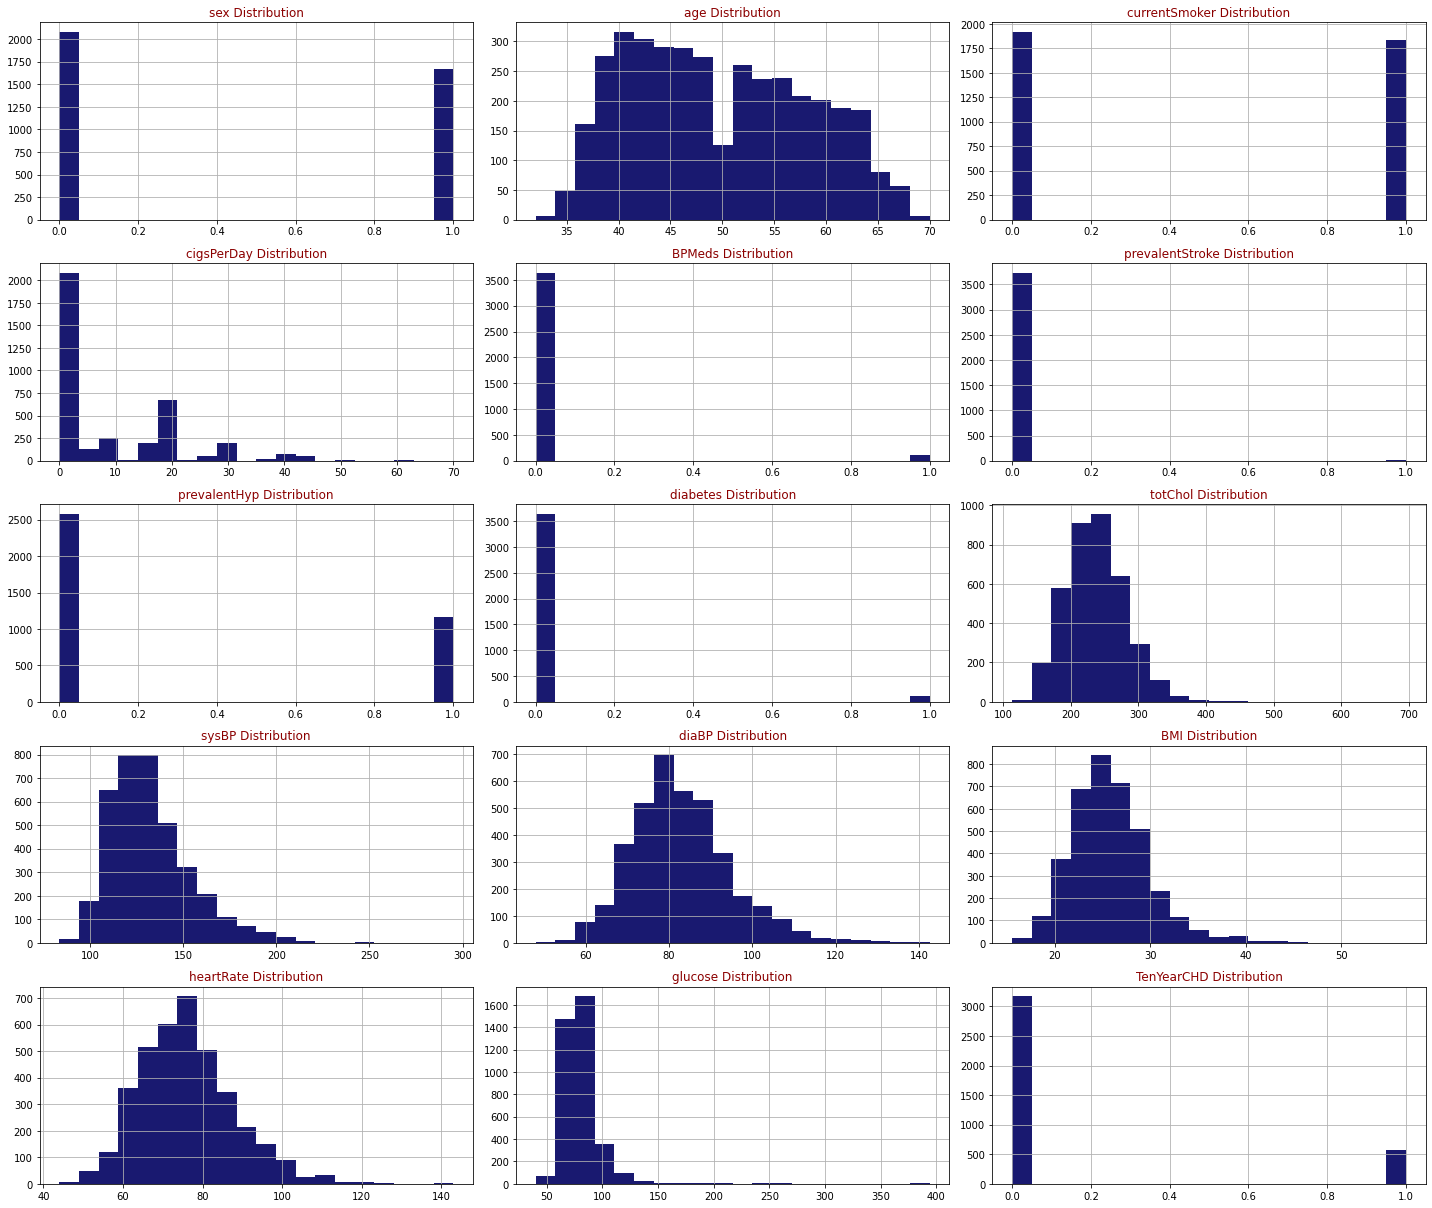

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)


In [ ]:
heart_df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

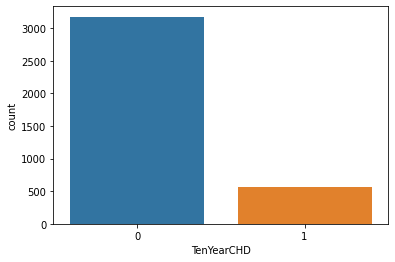

In [ ]:
sn.countplot(x='TenYearCHD',data=heart_df)

In [ ]:
#Normalization here

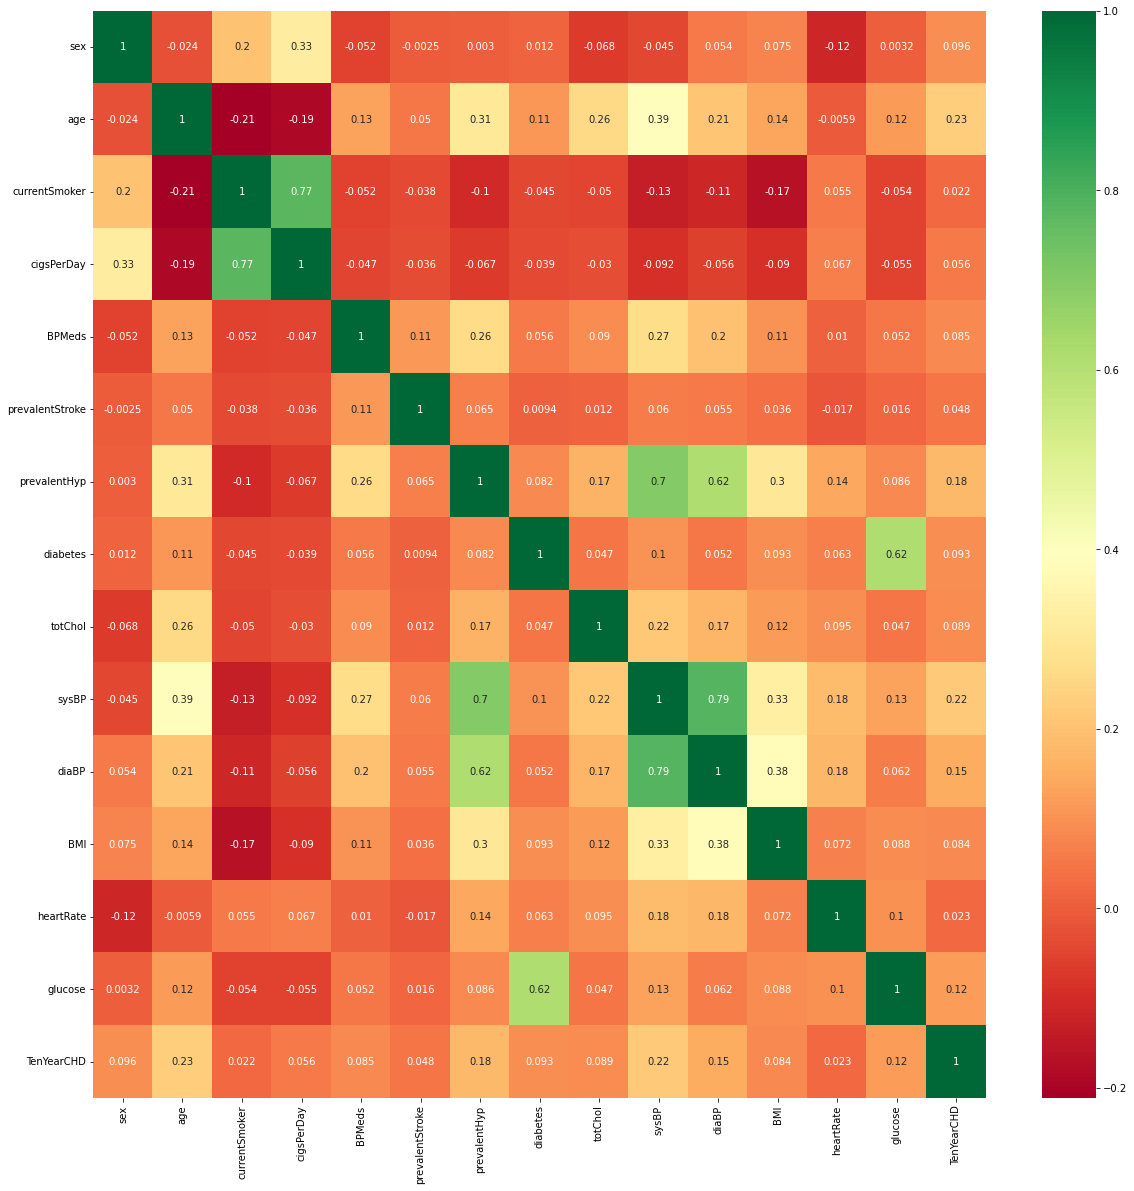

In [ ]:
plt.figure(figsize=(20,20))
sn.heatmap(heart_df.corr(),annot=True,cmap='RdYlGn')

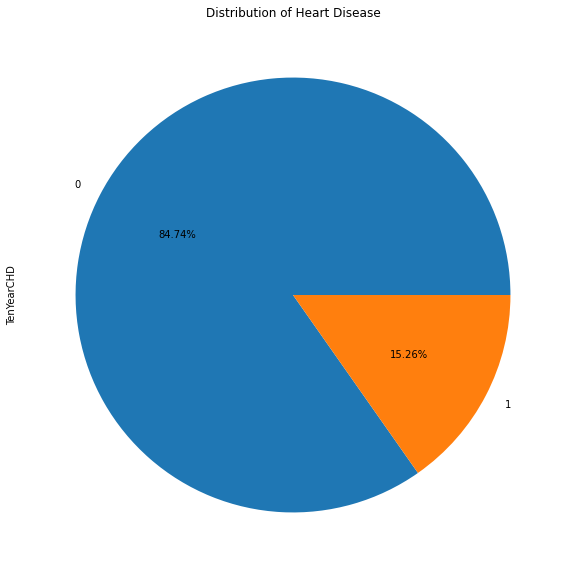

In [ ]:
#Distribution of heart diseases
plt.figure(figsize=(10,10))
plt.title("Distribution of Heart Disease")
heart_df["TenYearCHD"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The pie chart shows that 15.26% of the population is suffering from heart diseases, whereas 84.74% of the population is healthy.

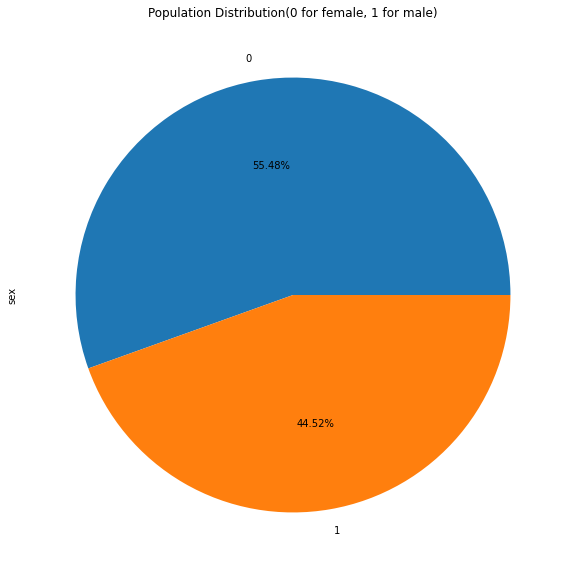

In [ ]:
#Population distribution
plt.figure(figsize=(10,10))
plt.title("Population Distribution(0 for female, 1 for male)")
heart_df["sex"].value_counts().plot(kind="pie",autopct='%1.2f%%')

This dataset comprises of 44.52% of male population and 55.48% females. There is not much significant difference over the distribution of population.

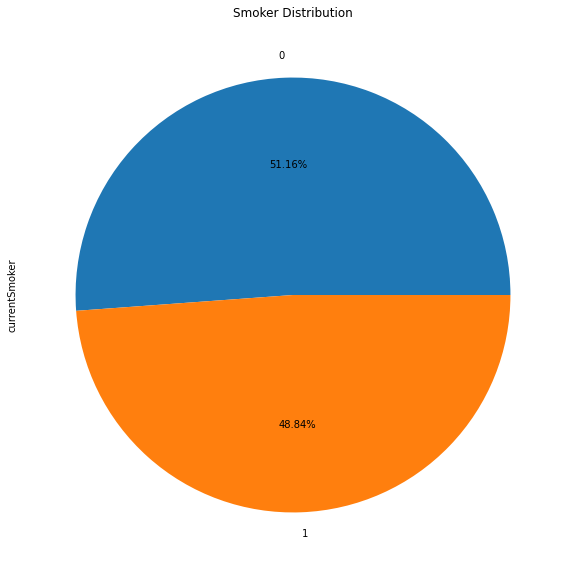

In [ ]:
#Currently Smokers distribution
plt.figure(figsize=(10,10))
plt.title("Smoker Distribution")
heart_df["currentSmoker"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The pie chart shows that 51.16% of the population are smokers and 48.84% are non smokers. There is no significant difference between smokers and non smokers.

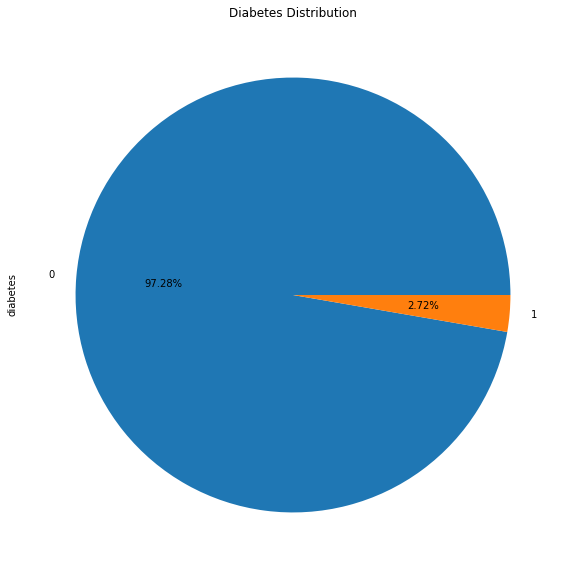

In [ ]:
#Diabetes distribution
plt.figure(figsize=(10,10))
plt.title("Diabetes Distribution")
heart_df["diabetes"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The pie chart shows that only 2.72% of the population in the dataset is diabetic, whereas 97.28% population is healthy. This imbalance in the distribution can affect the machine learning algorithms negatively.

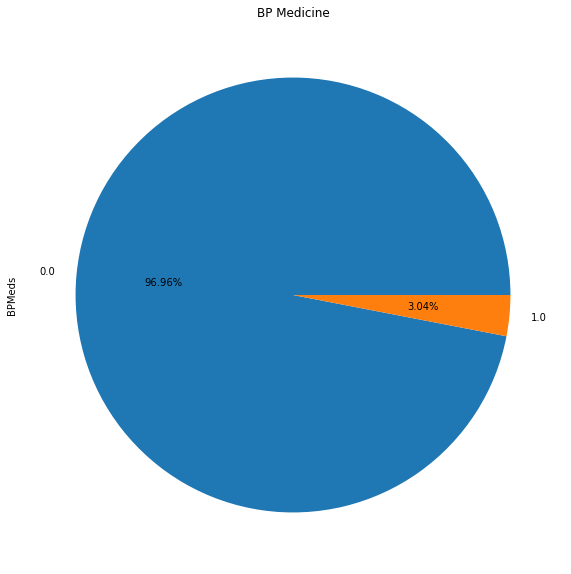

In [ ]:
#BP Meds distribution
plt.figure(figsize=(10,10))
plt.title("BP Medicine")
heart_df["BPMeds"].value_counts().plot(kind="pie",autopct='%1.2f%%')

According to the plot, 96.96% population do not take the BP Medicines.



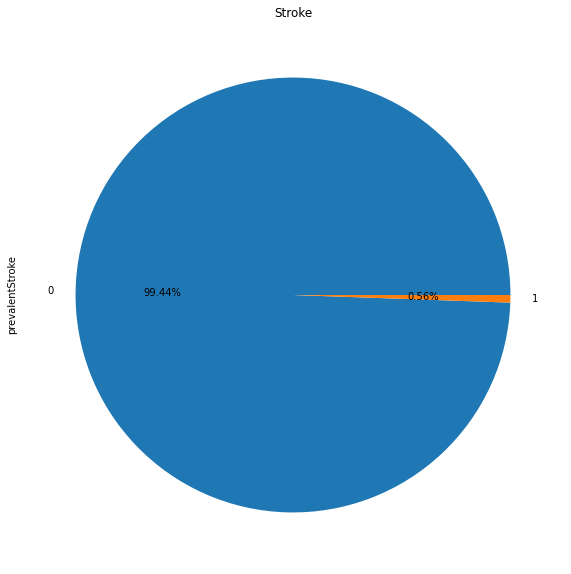

In [ ]:
#stroke distribution
plt.figure(figsize=(10,10))
plt.title("Stroke")
heart_df["prevalentStroke"].value_counts().plot(kind="pie",autopct='%1.2f%%')

According to the plot, 99.44% of the population is not suffering from prevalent Stroke.

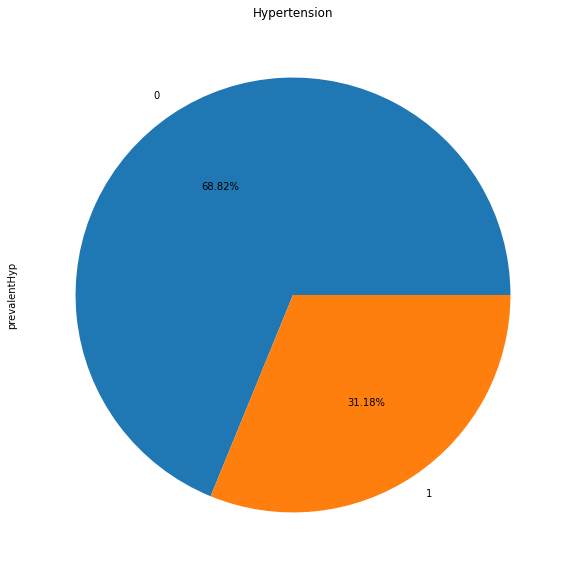

In [ ]:
#Hypertension distribution
plt.figure(figsize=(10,10))
plt.title("Hypertension")
heart_df["prevalentHyp"].value_counts().plot(kind="pie",autopct='%1.2f%%')

According to the plot, 31.18% of the population is suffering from Hypertension.

Text(0.5, 1.0, 'Heart Rate impact on Heart Disase')

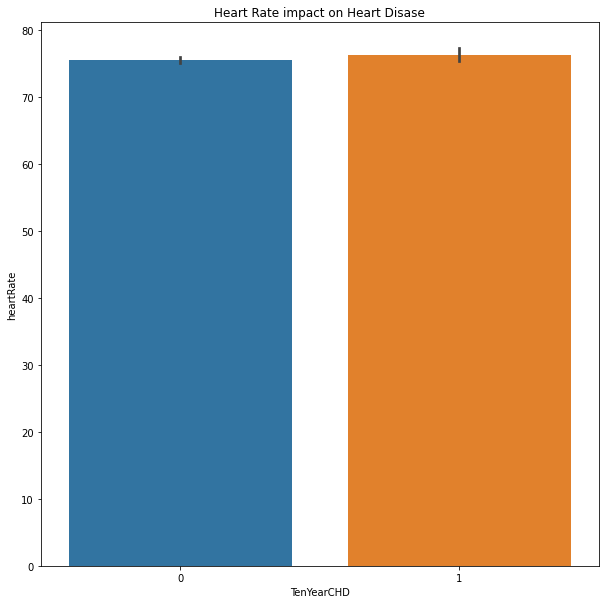

In [ ]:
#bar plot to plot heart disease affect on heart rate
plt.figure(figsize=(10,10))
sn.barplot(x="TenYearCHD",y="heartRate",data=heart_df)
plt.title("Heart Rate impact on Heart Disase")

According to the plot, we clearly see that heart rate does not have much impact on heart diseases

Text(0.5, 1.0, 'Cholesterol impact on Heart Disase')

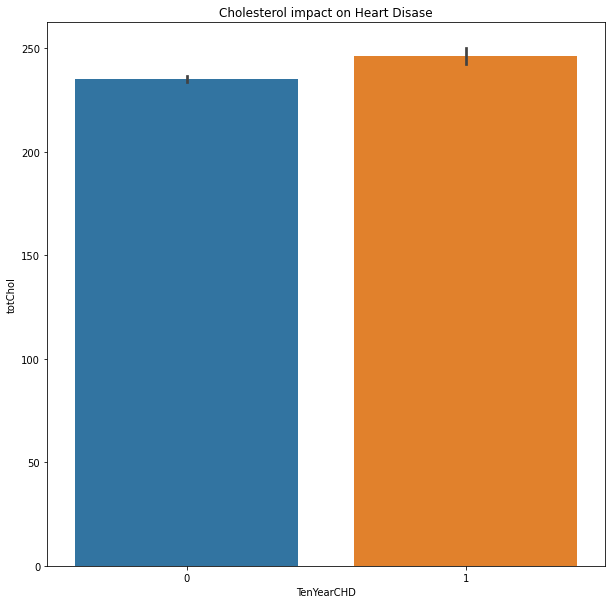

In [ ]:
#bar plot to plot heart disease affect on Cholestrol
plt.figure(figsize=(10,10))
sn.barplot(x="TenYearCHD",y="totChol",data=heart_df)
plt.title("Cholesterol impact on Heart Disase")

According to the plot, there is not much difference in Cholesterol levels of the population suffering from heart diseases and not suffering from heart diseases.

Text(0.5, 1.0, 'Glucose impact on Heart Disase')

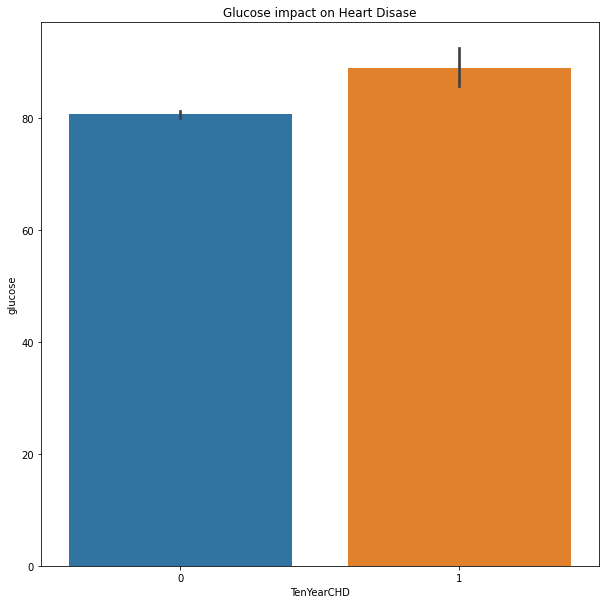

In [ ]:
#bar plot to plot glucose level impact on heart disease
plt.figure(figsize=(10,10))
sn.barplot(x="TenYearCHD",y="glucose",data=heart_df)
plt.title("Glucose impact on Heart Disase")

According to the plot, the glucose level does not have a significant difference in heart diseases.

Text(0.5, 1.0, 'BMI impact on Heart Disase')

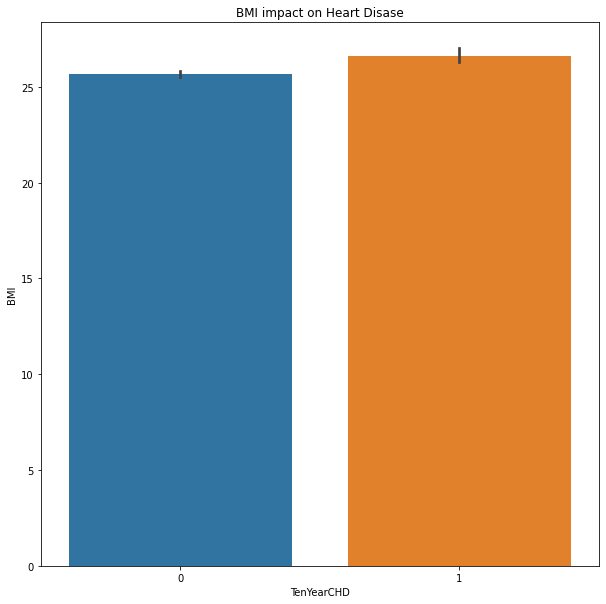

In [ ]:
#bar plot to plot BMI impact on heart disease
plt.figure(figsize=(10,10))
sn.barplot(x="TenYearCHD",y="BMI",data=heart_df)
plt.title("BMI impact on Heart Disase")

According to the plot, BMI does not have a significant difference in heart diseases.

Text(0.5, 1.0, 'diaBP impact on Heart Disase')

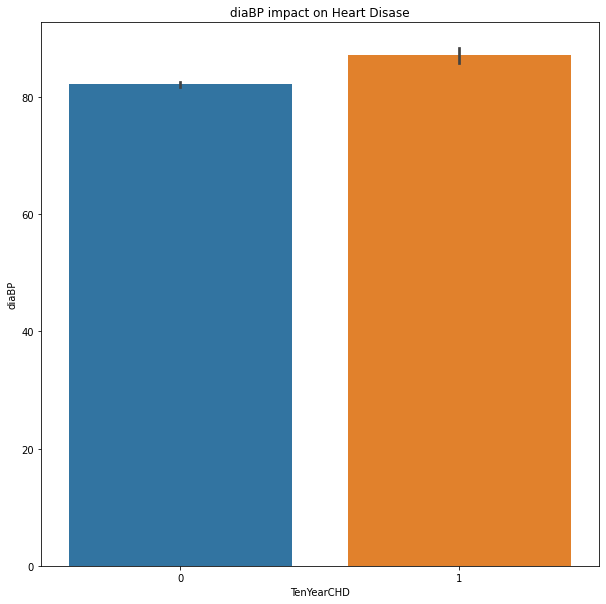

In [ ]:
#bar plot to plot diaBp impact on heart disease
plt.figure(figsize=(10,10))
sn.barplot(x="TenYearCHD",y="diaBP",data=heart_df)
plt.title("diaBP impact on Heart Disase")

According to the plot, diastolic Blood Pressure also does not have a significant difference in heart diseases.

Text(0.5, 1.0, 'sysBP impact on Heart Disase')

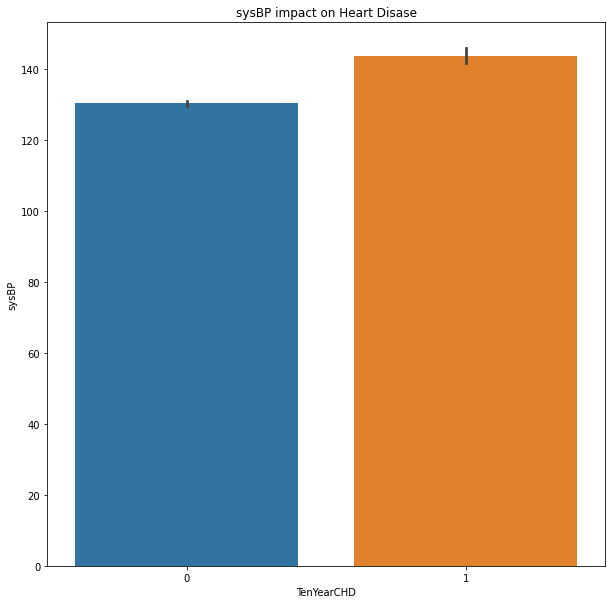

In [ ]:
#bar plot to plot sysBP impact on heart disease
plt.figure(figsize=(10,10))
sn.barplot(x="TenYearCHD",y="sysBP",data=heart_df)
plt.title("sysBP impact on Heart Disase")

According to the plot, systolic Blood Pressure also does not have a significant difference in heart diseases.

Text(0.5, 1.0, 'Cigarettes impact on Heart Disase')

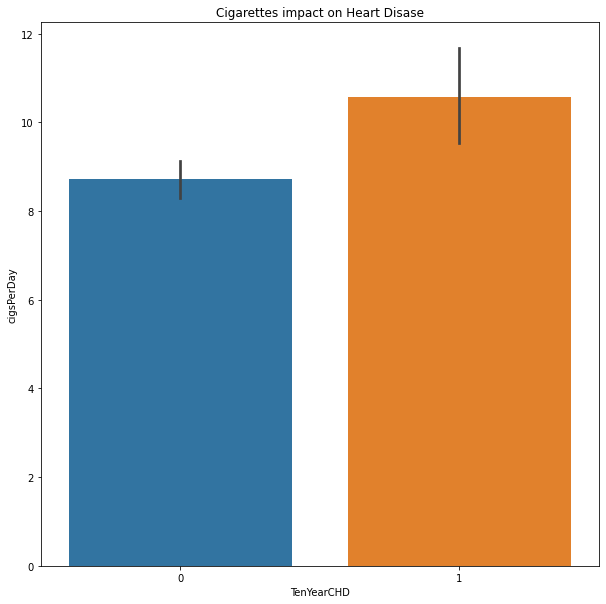

In [ ]:
#bar plot to plot cigs per day impact on heart disease
plt.figure(figsize=(10,10))
sn.barplot(x="TenYearCHD",y="cigsPerDay",data=heart_df)

plt.title("Cigarettes impact on Heart Disase")

According to the plot, the population with heart diseases smoke more cigarettes per day than the population not suffering from heart diseases.

Text(0.5, 1.0, 'Stroke impact on Heart Disase')

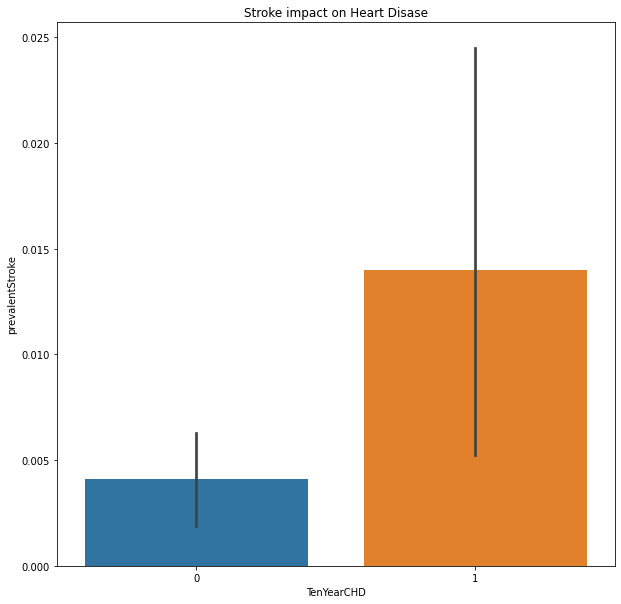

In [ ]:
#bar plot to plot stroke impact on heart disease
plt.figure(figsize=(10,10))
sn.barplot(x="TenYearCHD",y="prevalentStroke",data=heart_df)

plt.title("Stroke impact on Heart Disase")

According to the plot, the population suffering from Stroke has a higher probability of suffering from heart diseases.

Text(0.5, 1.0, 'Hypertension impact on Heart Disase')

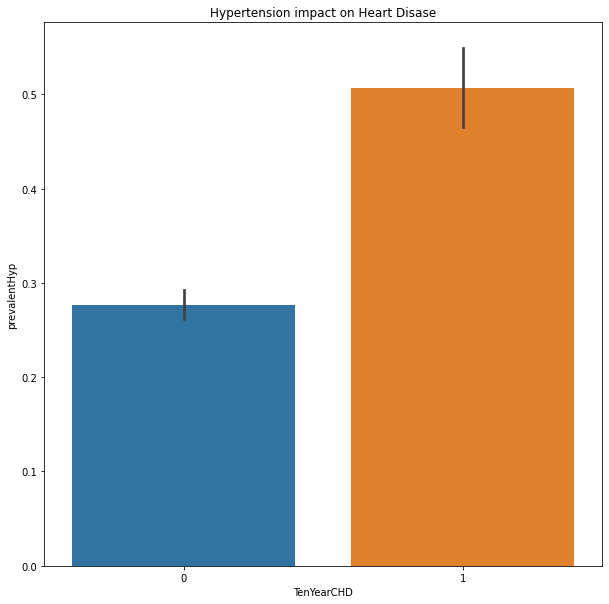

In [ ]:
#bar plot to plot hypertension impact on heart disease
plt.figure(figsize=(10,10))
sn.barplot(x="TenYearCHD",y="prevalentHyp",data=heart_df)

plt.title("Hypertension impact on Heart Disase")

According to the plot, the population suffering from Hypertension have higher chances of having Heart Diseases.



In [ ]:
heart_df.shape

(3749, 15)

In [ ]:
a = heart_df.drop(['TenYearCHD'], axis=1 )
b = pd.DataFrame(data = heart_df['TenYearCHD'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.3,random_state=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc

In [ ]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test,y_pred1))
print("accuracy score : ",accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       939
           1       0.47      0.05      0.09       186

    accuracy                           0.83      1125
   macro avg       0.66      0.52      0.50      1125
weighted avg       0.78      0.83      0.77      1125

accuracy score :  0.8337777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test,y_pred2))
print("accuracy score : ",accuracy_score(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       939
           1       0.22      0.23      0.22       186

    accuracy                           0.74      1125
   macro avg       0.53      0.53      0.53      1125
weighted avg       0.74      0.74      0.74      1125

accuracy score :  0.7404444444444445


In [ ]:
model3 = SVC()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test,y_pred3))
print("accuracy score : ",accuracy_score(y_test,y_pred3))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.83      1.00      0.91       939
           1       0.00      0.00      0.00       186

    accuracy                           0.83      1125
   macro avg       0.42      0.50      0.45      1125
weighted avg       0.70      0.83      0.76      1125

accuracy score :  0.8346666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model4 = GaussianNB()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
print(classification_report(y_test,y_pred4))
print("accuracy score : ",accuracy_score(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       939
           1       0.44      0.28      0.34       186

    accuracy                           0.82      1125
   macro avg       0.65      0.60      0.62      1125
weighted avg       0.80      0.82      0.81      1125

accuracy score :  0.8222222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model5 = KNeighborsClassifier()
model5.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)
print(classification_report(y_test,y_pred5))
print("accuracy score : ",accuracy_score(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       939
           1       0.24      0.05      0.09       186

    accuracy                           0.82      1125
   macro avg       0.54      0.51      0.49      1125
weighted avg       0.74      0.82      0.76      1125

accuracy score :  0.816


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
model6 = AdaBoostClassifier()
model6.fit(x_train,y_train)
y_pred6 = model6.predict(x_test)
print(classification_report(y_test,y_pred6))
print("accuracy score : ",accuracy_score(y_test,y_pred6))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.97      0.91       939
           1       0.48      0.12      0.19       186

    accuracy                           0.83      1125
   macro avg       0.66      0.55      0.55      1125
weighted avg       0.79      0.83      0.79      1125

accuracy score :  0.8328888888888889


In [ ]:
model7 = BaggingClassifier()
model7.fit(x_train,y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test,y_pred7))
print("accuracy score : ",accuracy_score(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       939
           1       0.35      0.11      0.16       186

    accuracy                           0.82      1125
   macro avg       0.60      0.53      0.53      1125
weighted avg       0.76      0.82      0.78      1125

accuracy score :  0.8195555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model8 = RandomForestClassifier()
model8.fit(x_train,y_train)
y_pred8 = model8.predict(x_test)
print(classification_report(y_test,y_pred8))
print("accuracy score : ",accuracy_score(y_test,y_pred8))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.84      0.99      0.91       939
           1       0.50      0.04      0.08       186

    accuracy                           0.83      1125
   macro avg       0.67      0.52      0.49      1125
weighted avg       0.78      0.83      0.77      1125

accuracy score :  0.8346666666666667


Here , we are considering medical data so we will maximize f1 score for true values . We check all the algorithms and we see the report of Gaussain Nave Bayes Classifier to come out the maximum so that's the optimum model that was considered. 